In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.decomposition import PCA


# Train data #

In [2]:
train_data = np.load('X_kannada_MNIST_train.npz')
print(train_data.files)

['arr_0']


In [3]:
train_data.keys()

KeysView(NpzFile 'X_kannada_MNIST_train.npz' with keys: arr_0)

In [4]:
train_data['arr_0'].size

47040000

In [5]:
train_data['arr_0'].shape

(60000, 28, 28)

In [6]:
train_data['arr_0'][0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         21, 234, 255, 255, 149,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<Figure size 640x480 with 0 Axes>

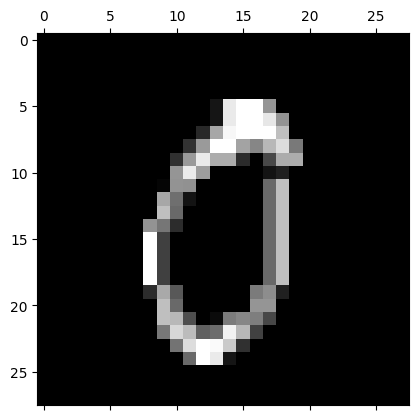

In [7]:
plt.gray()
plt.matshow(train_data['arr_0'][0].reshape(28,28))


In [8]:
train_data_y = np.load('y_kannada_MNIST_train.npz')
train_data_y.keys()

KeysView(NpzFile 'y_kannada_MNIST_train.npz' with keys: arr_0)

In [ ]:
train_data_y.files

['arr_0']

In [10]:
np.unique(train_data_y['arr_0'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
train_df = pd.DataFrame(train_data['arr_0'].reshape(60000,-1))
train_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_df.shape

(60000, 784)

In [13]:
X = train_df
y = train_data_y['arr_0']

In [14]:
y

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00408252,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00408252,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00408252,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00408252,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00408252,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00408252,  0.        ]])

In [16]:
X = train_df
y = train_data_y['arr_0']
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"********{type(model).__name__}*********")
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
print()


********RandomForestClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.9781735190194359
Test Recall : 0.978
Test F1_Score: 0.9780042951169711

confusion matrix :
[[1160   19    0    5    1    1    1    0    2    1]
 [   6 1198    0    1    1    1    0    0    0    0]
 [   1    0 1214    4    0    0    0    0    0    0]
 [   7    0    0 1175   12    8    0   11    0    0]
 [   0    0    0    6 1189    2    0    0    1    1]
 [   0    0    1    5    9 1194    1    2    0    0]
 [   0    0    0   11    1    0 1135   21    0    1]
 [   1    0    0   19    8    0   49 1140    0    2]
 [   4    0    0    1    1    2    0    0 1203    1]
 [   0    0    0    7    5    0   15    4    1 1128]]



In [ ]:
X.shape

(60000, 784)

## Component size : 10  ##

In [18]:
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X)
X_pca.shape

(60000, 10)

In [ ]:
X_pca

array([[ 603.28736067, -265.96865379,   29.55155812, ...,  -41.23881149,
         382.80657227, -185.98746216],
       [ 298.50819083,  -97.54467286,   53.10400147, ...,  244.26806558,
         253.08592768,  259.3390692 ],
       [-425.62213499,  646.15166753,  433.60553734, ..., -398.21995192,
         346.05231089, -131.95305291],
       ...,
       [-568.86596665,    5.94680884,  470.63067113, ..., -222.27073109,
         148.94487953, -165.07828895],
       [ 771.7419748 , -105.77872921,  296.48455563, ...,  -82.10581806,
          69.09679527,   85.63103737],
       [ 399.34442151,  222.77927913,  161.38486332, ..., -138.25637093,
          98.98564318,  142.90846534]])

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"********{type(model).__name__}*********")
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
print()

********RandomForestClassifier*********
Train Precision : 0.999979170964858
Train Recall : 0.9999791666666666
Train F1 Score : 0.9999791666601975

Test Precision : 0.9537420431740905
Test Recall : 0.9534166666666667
Test F1_Score: 0.953452483034081

confusion matrix :
[[1159   40    0   12    1    1    0    2    7    4]
 [  19 1172    0    6    2    0    0    0    5    4]
 [   8    1 1219    2    0    3    1    1    2    0]
 [  12    2    4 1120    7    3    6   20    1    1]
 [   0    0    1    9 1113   21    1    0    3    6]
 [   0    0    1   17   19 1139    1    2    1    2]
 [   1    2    2   10    2    0 1125   46    1    5]
 [   2    5    3   21    3    1   91 1092    0    2]
 [  19    3    0    6    1    2    0    0 1173    5]
 [   7    1    0    3   13    1   23   11    6 1129]]



In [21]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2)
models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
    print()

********RandomForestClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.9555873210855867
Test Recall : 0.9554166666666667
Test F1_Score: 0.9553581629094395

confusion matrix :
[[1109   40    0    4    0    0    1    2   12    1]
 [  14 1183    0    6    0    0    1    0    5    3]
 [  13    2 1189    3    0    3    0    1    0    1]
 [   7    3    3 1178    8    8    2   12    0    1]
 [   0    0    0    5 1169   20    1    1    4    4]
 [   0    1    5   11   19 1167    1    0    4    0]
 [   2    0    0    9    4    2 1162   46    0    4]
 [   1    3    1   19    2    1   93 1050    1   11]
 [  12    5    0    3    3    1    0    0 1148    8]
 [   9    0    0    4   23    2   13   12    9 1110]]

********DecisionTreeClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.9020393199913289
Test Recall : 0.9019166666666667
Test F1_Score: 0.9019471239611283

confusion matrix :
[[1040   62    8

## Component size : 15 ##

In [22]:
pca = PCA(n_components=15)

X_pca_15 = pca.fit_transform(X)
X_pca_15.shape

(60000, 15)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_15,y,test_size=0.2)
models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
    print()

********RandomForestClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.9646259862639125
Test Recall : 0.9644166666666667
Test F1_Score: 0.9643905766760136

confusion matrix :
[[1110   62    0   10    1    0    1    1   11    3]
 [  14 1208    0    4    2    0    0    0    1    4]
 [  10    0 1184    3    1    3    0    0    0    0]
 [   7    1    2 1139    8    4    2   14    0    0]
 [   0    0    0    3 1171   22    0    1    5    1]
 [   0    0    1   11   10 1143    0    0    3    0]
 [   0    0    0    9    3    2 1149   22    3    5]
 [   1    3    0   19    2    1   64 1111    0    1]
 [  17    0    0    1    3    2    0    0 1196    4]
 [   2    0    0    1    9    1   15    8    3 1162]]

********DecisionTreeClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.9094750035679322
Test Recall : 0.9093333333333333
Test F1_Score: 0.9093558274825349

confusion matrix :
[[1054   67   11

## Componenet size : 20 ##

In [24]:
pca = PCA(n_components=20)
X_pca_20 = pca.fit_transform(X)
X_pca_20.shape

(60000, 20)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_20,y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f"Train Precision score : {precision_score(y_train,train_pred,average='weighted')}")
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='weighted')}")
    print(f"Train F1-score:{f1_score(y_train,train_pred,average='weighted')}")
    print()
    print(f"Test Precison score : {precision_score(y_test,test_pred,average='weighted')}")
    print(f"Recall score : {recall_score(y_test,test_pred,average='weighted')}")
    print(f"F1-score : {f1_score(y_test,test_pred,average='weighted')}")
    print()
    print(f"confusion matrix :\n {confusion_matrix(y_test,test_pred)}")

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score:1.0

Test Precison score : 0.9642175688425041
Recall score : 0.964
F1-score : 0.9640050961393916

confusion matrix :
 [[1087   42    0    7    2    0    0    1   10    3]
 [  15 1144    0    2    0    0    0    0    2    6]
 [  12    3 1205    4    0    2    0    1    1    0]
 [  12    0    0 1164    5    5    0   12    1    1]
 [   0    0    0    5 1169   17    0    0    3    1]
 [   0    0    1   10   10 1165    0    1    2    1]
 [   2    0    0    7    3    0 1153   35    1    3]
 [   3    3    2   13    3    2   69 1128    0    2]
 [  11    0    0    1    2    5    0    0 1204    4]
 [   3    0    0    3    8    3   27   11    6 1149]]
********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score:1.0

Test Precison score : 0.9091180017487162
Recall score : 0.9088333333333334
F1-score : 0.9089457626621491

confusion matrix :
 [[1022

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_20,y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f"Train Precision score : {precision_score(y_train,train_pred,average='macro')}")
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score:{f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precison score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Recall score : {recall_score(y_test,test_pred,average='macro')}")
    print(f"F1-score : {f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f"confusion matrix :\n {confusion_matrix(y_test,test_pred)}")

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score:1.0

Test Precison score : 0.9695487120366101
Recall score : 0.9693901604851523
F1-score : 0.9693985269927351

confusion matrix :
 [[1167   46    0    6    2    0    1    1    8    0]
 [  11 1212    0    4    2    0    1    0    3    3]
 [   6    0 1165    3    0    4    0    0    0    1]
 [   7    1    2 1150    6    3    3   10    0    0]
 [   0    1    0    4 1168   16    3    0    0    6]
 [   0    0    0   16   12 1148    0    1    2    1]
 [   0    0    1    6    1    1 1143   22    0    9]
 [   2    2    0   17    5    1   45 1101    0    2]
 [  12    0    0    3    2    1    0    0 1193    6]
 [   2    0    0    2    7    1   13    6    2 1186]]
********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score:1.0

Test Precison score : 0.9139045910799093
Recall score : 0.9137308773632522
F1-score : 0.9137850078296722

confusion mat

## Component size : 25 ##

In [27]:
pca = PCA(n_components=25)
X_pca_25 = pca.fit_transform(X)
X_pca_25.shape

(60000, 25)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_25,y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f"Train Precision score : {precision_score(y_train,train_pred,average='macro')}")
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score:{f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precison score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Recall score : {recall_score(y_test,test_pred,average='macro')}")
    print(f"F1-score : {f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f"confusion matrix :\n {confusion_matrix(y_test,test_pred)}")   
    

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score:1.0

Test Precison score : 0.9686962420895213
Recall score : 0.9686414241305172
F1-score : 0.9685917986168409

confusion matrix :
 [[1155   41    1    6    1    1    2    0    6    2]
 [   7 1143    0    7    0    0    0    1    2    6]
 [   9    2 1179    4    0    4    0    0    0    0]
 [   8    1    0 1145    6    5    1   12    2    0]
 [   0    0    0    3 1217   25    0    1    4    1]
 [   0    0    0   12    6 1174    1    0    1    0]
 [   1    0    1    9    1    2 1155   26    0    5]
 [   2    1    0   16    2    1   45 1138    0    4]
 [  11    1    0    6    2    4    0    0 1179    2]
 [   1    0    0    5   11    2   14    5    6 1138]]
********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score:1.0

Test Precison score : 0.9124371059840659
Recall score : 0.9122031247337862
F1-score : 0.9122715290668546

confusion mat

## Component size : 30 ##

In [265]:
pca = PCA(n_components=30)
X_pca_30 = pca.fit_transform(X)
X_pca_30.shape

(60000, 30)

In [266]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_30,y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f"Train Precision score : {precision_score(y_train,train_pred,average='macro')}")
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score : {f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precision score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Test Recall score : {recall_score(y_test,test_pred,average='macro')}")
    print(f"Test F1-score : {f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f"Confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
     

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score : 1.0

Test Precision score : 0.9710024510090103
Test Recall score : 0.9709807613649108
Test F1-score : 0.9709315261254783

Confusion matrix :
[[1182   37    0    6    0    0    1    0    6    2]
 [  12 1192    0    2    1    1    0    1    1    2]
 [   7    3 1203    2    0    2    0    0    0    1]
 [   9    2    4 1096    8    3    2   15    0    1]
 [   0    1    0    5 1158   10    1    0    0    1]
 [   0    0    2   13   10 1137    1    1    1    0]
 [   1    1    1    3    2    1 1158   22    1    7]
 [   1    0    1   19    3    0   45 1163    0    1]
 [  18    1    0    2    2    1    0    0 1186    1]
 [   1    0    0    1   12    0   19    3    2 1176]]
********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score : 1.0

Test Precision score : 0.9070345937625275
Test Recall score : 0.9066606574372335
Test F1-score : 0.906770

# Test data: #

In [267]:
test_data_X = np.load('X_kannada_MNIST_test.npz')
test_data_X.files

['arr_0']

In [268]:
test_data_X['arr_0'].size

7840000

In [269]:
test_data_X['arr_0'].shape

(10000, 28, 28)

In [270]:
test_data_X['arr_0'][0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 255,
        255, 255, 255, 255, 255, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<Figure size 640x480 with 0 Axes>

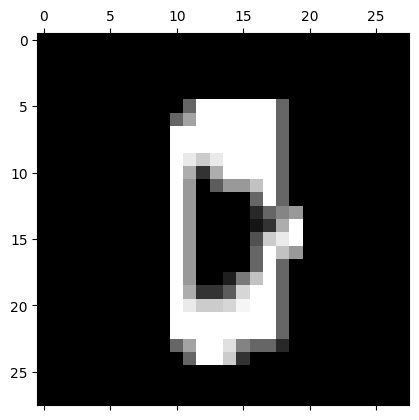

In [271]:
plt.gray()
plt.matshow(test_data_X['arr_0'][0].reshape(28,28))

In [272]:
test_data_y = np.load('y_kannada_MNIST_test.npz')
test_data_y.files

['arr_0']

In [273]:
np.unique(test_data_y['arr_0'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [274]:
test_df = pd.DataFrame(test_data_X['arr_0'].reshape(10000,-1))
test_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
test_df.shape

(10000, 784)

In [276]:
test_data_X = test_df
test_y = test_data_y['arr_0']

In [277]:
test_data_X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
test_y

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

In [279]:
scaler = StandardScaler()
test_X_scaled = scaler.fit_transform(test_data_X)
test_X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [280]:
test_data_X.shape

(10000, 784)

## Component size : 10 ##

In [281]:
pca = PCA(n_components=10)
test_X_pca = pca.fit_transform(test_X_scaled)
test_X_pca.shape

(10000, 10)

In [282]:
x_train,x_test,y_train,y_test = train_test_split(test_X_pca,test_y,test_size=0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"********{type(model).__name__}*********")
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
print()



********RandomForestClassifier*********
Train Precision : 0.9998751608751608
Train Recall : 0.999875
Train F1 Score : 0.9998750004611104

Test Precision : 0.869064504305812
Test Recall : 0.8675
Test F1_Score: 0.8671412205498669

confusion matrix :
[[171  34   0   4   0   0   0   0   3   2]
 [ 23 183   0   6   1   1   0   3   3   4]
 [  1   0 189   0   0   1   0   0   0   0]
 [  3   4   0 148   2   2   1   2   0   0]
 [  0   0   0  15 150  18   0   0   4   1]
 [  1   0   0   1  20 178   1   0   1   0]
 [  0   1   0   4   1   0 175  21   1   2]
 [  2   5   0  13   1   0  32 177   2   0]
 [  4   2   0   0   0   1   0   0 181   2]
 [  2   1   0   2   0   0   0   0   4 183]]



In [283]:
x_train,x_test,y_train,y_test = train_test_split(test_X_pca,test_y,test_size=0.2)
models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
    print()

********RandomForestClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.8601405000795226
Test Recall : 0.858
Test F1_Score: 0.8575652648148241

confusion matrix :
[[169  32   0   7   0   0   0   1   1   3]
 [ 19 177   0   2   0   1   0   0   0   3]
 [  0   0 182   1   0   1   0   0   0   1]
 [  0   2   0 167   5   4   3   4   0   0]
 [  0   0   0  21 164  26   1   1   0   1]
 [  0   0   0   1  19 194   1   0   1   0]
 [  1   3   0   5   3   0 149  22   0   2]
 [  0   2   0  11   1   1  30 147   5   0]
 [  3   1   0   0   0   1   0   0 181   3]
 [ 10   1   0   4   0   0   0   1  12 186]]

********DecisionTreeClassifier*********
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Precision : 0.7607650781837921
Test Recall : 0.758
Test F1_Score: 0.7588116498574148

confusion matrix :
[[142  46   2  10   2   0   0   3   5   3]
 [ 36 142   0   3   0   0   1   6   6   8]
 [  1   0 177   1   0   1   2   1   1   1]
 [  4   2   0

## Component size : 15 ##

In [284]:
pca = PCA(n_components=15)
test_X_pca_15 = pca.fit_transform(test_X_scaled)
test_X_pca_15.shape

(10000, 15)

In [285]:
x_train,x_test,y_train,y_test = train_test_split(test_X_pca_15,test_y,test_size=0.2)

models =[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*******")
    print(f"Train Precision score :{precision_score(y_train,train_pred,average='macro')}")
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score : {f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precision score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Test Recall score :{recall_score(y_test,test_pred,average='macro')}")
    print(f"Test F1-score :{f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f"Confusion matrix :\n {confusion_matrix(y_test,test_pred)}")

********RandomForestClassifier*******
Train Precision score :1.0
Train Recall score : 1.0
Train F1-score : 1.0

Test Precision score : 0.9168855091544706
Test Recall score :0.9160595869913383
Test F1-score :0.9160879086653007

Confusion matrix :
 [[163  20   0   6   0   0   0   1   3   0]
 [  8 180   0   3   0   0   0   2   1   0]
 [  0   0 224   1   0   0   0   0   0   0]
 [  1   0   0 184   3   2   2   8   0   0]
 [  0   0   0   1 188   6   1   0   3   1]
 [  0   1   1   1   5 201   2   0   0   0]
 [  0   3   0   5   1   1 170  17   0   2]
 [  0   4   0   3   2   3  23 166   0   1]
 [  2   1   1   1   0   1   1   0 184   1]
 [  2   0   0   2   0   0   1   2   3 174]]
********DecisionTreeClassifier*******
Train Precision score :1.0
Train Recall score : 1.0
Train F1-score : 1.0

Test Precision score : 0.8325331660058153
Test Recall score :0.8313426771381485
Test F1-score :0.8315644765112294

Confusion matrix :
 [[157  24   0   4   0   0   0   1   7   0]
 [ 29 145   1   5   0   2   1   

## Component size : 20 ##

In [286]:
pca = PCA(n_components=20)
test_X_pca_20 = pca.fit_transform(test_X_scaled)
test_X_pca_20.shape

(10000, 20)

In [287]:
x_train,x_test,y_train,y_test = train_test_split(test_X_pca_20,test_y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f'Train Precision score : {precision_score(y_train,train_pred,average='macro')}')
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score :{f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precision score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Test Recall score : {recall_score(y_test,test_pred,average='macro')}")
    print(f"Test F1-score : {f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f'Confusion matrix : \n {confusion_matrix(y_test,test_pred)}')
    print()

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score :1.0

Test Precision score : 0.9298146602481518
Test Recall score : 0.928458241796417
Test F1-score : 0.9288334826234292

Confusion matrix : 
 [[172  16   0   5   0   0   0   1   0   0]
 [  9 185   0   6   0   0   0   0   0   2]
 [  1   0 216   0   0   2   0   0   0   0]
 [  2   3   0 197   0   4   0   4   0   0]
 [  0   0   0   7 179   4   1   0   3   1]
 [  0   0   0   0   7 192   0   0   0   0]
 [  0   1   0   5   3   2 171   7   0   2]
 [  1   0   0   7   3   0  12 169   0   1]
 [  5   1   0   1   1   0   0   0 173   1]
 [  2   1   0   0   1   0   0   1   5 205]]

********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score :1.0

Test Precision score : 0.8368059629396338
Test Recall score : 0.8366879342949034
Test F1-score : 0.8364956849008429

Confusion matrix : 
 [[149  16   0   7   1   0   0   5  12   4]
 [ 24 161   0   2   0   

## Component size : 25 ##

In [288]:
pca = PCA(n_components=25)
test_X_pca_25 = pca.fit_transform(test_X_scaled)
test_X_pca_25.shape

(10000, 25)

In [289]:
x_train,x_test,y_train,y_test = train_test_split(test_X_pca_25,test_y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f'Train Precision score : {precision_score(y_train,train_pred,average='macro')}')
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score :{f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precision score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Test Recall score : {recall_score(y_test,test_pred,average='macro')}")
    print(f"Test F1-score : {f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f'Confusion matrix : \n {confusion_matrix(y_test,test_pred)}')
    print()

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score :1.0

Test Precision score : 0.930734023616403
Test Recall score : 0.9306767776260519
Test F1-score : 0.9301868588520172

Confusion matrix : 
 [[168  18   0   4   0   0   0   2   4   1]
 [  5 172   0   2   0   0   0   0   0   1]
 [  2   0 180   0   0   1   0   0   0   0]
 [  1   4   0 172   1   6   5   2   1   0]
 [  1   0   0   2 216   3   5   1   3   1]
 [  0   2   1   3   6 196   0   0   0   0]
 [  0   1   0   1   0   1 198   9   0   1]
 [  2   0   0   3   2   2  15 183   1   0]
 [  3   0   0   0   0   0   0   0 194   1]
 [  1   0   0   0   0   0   0   4   5 181]]

********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score :1.0

Test Precision score : 0.8250988971900778
Test Recall score : 0.8249451832071228
Test F1-score : 0.8247268935785952

Confusion matrix : 
 [[148  22   3   8   0   0   1   5   5   5]
 [ 24 142   1   6   0   

## Component size : 30 ##

In [290]:
pca = PCA(n_components=30)
test_X_pca_30 = pca.fit_transform(test_X_scaled)
test_X_pca_30.shape

(10000, 30)

In [291]:
x_train,x_test,y_train,y_test = train_test_split(test_X_pca_30,test_y,test_size=0.2)

models = [RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}********")
    print(f'Train Precision score : {precision_score(y_train,train_pred,average='macro')}')
    print(f"Train Recall score : {recall_score(y_train,train_pred,average='macro')}")
    print(f"Train F1-score :{f1_score(y_train,train_pred,average='macro')}")
    print()
    print(f"Test Precision score : {precision_score(y_test,test_pred,average='macro')}")
    print(f"Test Recall score : {recall_score(y_test,test_pred,average='macro')}")
    print(f"Test F1-score : {f1_score(y_test,test_pred,average='macro')}")
    print()
    print(f'Confusion matrix : \n {confusion_matrix(y_test,test_pred)}')
    print()

********RandomForestClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score :1.0

Test Precision score : 0.9302053604101168
Test Recall score : 0.9284359955482504
Test F1-score : 0.9289442231287669

Confusion matrix : 
 [[171  19   0   4   0   0   0   1   1   2]
 [  6 197   0   5   0   0   0   4   0   1]
 [  3   1 178   0   0   1   0   0   0   0]
 [  2   2   0 194   1   8   2   2   1   0]
 [  0   0   0   4 181   5   0   0   4   1]
 [  0   2   0   0   4 192   0   0   0   0]
 [  0   1   0   5   4   2 164   9   0   3]
 [  0   0   0   3   0   0  12 195   1   1]
 [  0   1   0   0   1   0   1   0 208   2]
 [  1   1   0   0   0   0   0   3   6 177]]

********DecisionTreeClassifier********
Train Precision score : 1.0
Train Recall score : 1.0
Train F1-score :1.0

Test Precision score : 0.8283066217016698
Test Recall score : 0.8290035556171267
Test F1-score : 0.8282063535779136

Confusion matrix : 
 [[152  21   2   8   0   0   3   2   6   4]
 [ 29 164   0  10   1  